# Import data from Github

In [89]:
import pandas as pd
print(pd.__version__)

1.2.4


In [5]:
import os, types
import io, requests
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

url_confirm = 'https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/texas_covid_confirmed.csv'
url_death = 'https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/texas_covid_deaths.csv'

s_confirm = requests.get(url_confirm).content
s_death = requests.get(url_death).content

texas_covid_confirmed = pd.read_csv(io.StringIO(s_confirm.decode('utf-8')))
texas_covid_deaths = pd.read_csv(io.StringIO(s_death.decode('utf-8')))

In [6]:
#texas_covid_confirmed.columns
#texas_covid_confirmed.head()
#texas_covid_confirmed[texas_covid_confirmed.isna().any(axis=1)]

In [7]:
#texas_covid_deaths.columns
#texas_covid_deaths.head()

In [8]:
import json

url_county_zone = 'https://raw.githubusercontent.com/WiDSTexas2021/datathon-code/main/data/weather_zone_counties.json'
s_county_zone = requests.get(url_county_zone).content
county_zone_dic = json.loads(s_county_zone)
zone_arry = np.array(list(county_zone_dic.keys()))
#print(zone_arry)


In [9]:
counties_arry = np.array(texas_covid_confirmed.columns.drop('Date'))
#print(counties_arry)
dates = np.array(texas_covid_confirmed['Date'])
#print(dates, len(dates))

In [10]:
tx_covid_confirmed_wZone = texas_covid_confirmed.set_index('Date', inplace = False).transpose()
tx_covid_confirmed_wZone.insert(0, 'Zone', "")
#tx_covid_confirmed_wZone.head()

In [11]:
tx_covid_deaths_wZone = texas_covid_deaths.set_index('Date', inplace = False).T
tx_covid_deaths_wZone.insert(0, 'Zone', "")
#tx_covid_deaths_wZone.head()

# Map each county to corresponding zone

In [79]:
## Assign zone to each county
def get_zone(county):
    for z in zone_arry:
        if (county in county_zone_dic[z]) is True:
            return z
            
for county in counties_arry:
    tx_covid_confirmed_wZone.loc[county, 'Zone'] = get_zone(county)
    tx_covid_deaths_wZone.loc[county, 'Zone'] = get_zone(county)
            
tx_covid_confirmed_wZone.head()
#tx_covid_deaths_wZone.head()

Date,Zone,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05
Anderson,East,0,0,0,0,0,0,0,0,0,...,6220,6217,6217,6217,6217,6217,6212,6227,6234,6235
Andrews,Far West,0,0,0,0,0,0,0,0,0,...,1832,1834,1834,1834,1834,1834,1834,1837,1837,1837
Angelina,East,0,0,0,0,0,0,0,0,0,...,8613,8613,8613,8613,8613,8613,8669,8669,8669,8669
Aransas,South,0,0,0,0,0,0,0,0,0,...,1255,1258,1258,1258,1258,1258,1259,1261,1263,1263
Archer,North,0,0,0,0,0,0,0,0,0,...,811,811,811,811,811,811,811,811,812,812


# Aggregate daily cases for each ERCOT zone

In [88]:
grouped_confirmed = tx_covid_confirmed_wZone.groupby('Zone')
grouped_deaths = tx_covid_deaths_wZone.groupby('Zone')
#print(grouped_confirmed.agg([np.sum, np.mean, np.std]))
#print(grouped_deaths['2020-04-30'].agg([np.sum, np.mean, np.std]))
zone_daily_covid_confirmed_sum = pd.DataFrame(index=dates, columns = zone_arry)
zone_daily_covid_deaths_sum = pd.DataFrame(index=dates, columns = zone_arry)
zone_daily_covid_confirmed_mean = pd.DataFrame(index=dates, columns = zone_arry)
zone_daily_covid_deaths_mean = pd.DataFrame(index=dates, columns = zone_arry)
zone_daily_covid_confirmed_std = pd.DataFrame(index=dates, columns = zone_arry)
zone_daily_covid_deaths_std = pd.DataFrame(index=dates, columns = zone_arry)
#print(zone_daily_covid_confirmed_sum)

for day in dates:
    daily_confirmed = pd.DataFrame(grouped_confirmed[day].agg([np.sum, np.mean, np.std]))
    daily_deaths = pd.DataFrame(grouped_deaths[day].agg([np.sum, np.mean, np.std]))
    #print(daily_confirmed.loc['Coast','sum'])
    for zone in zone_arry:
        zone_daily_covid_confirmed_sum.loc[day,zone] = daily_confirmed.loc[zone,'sum'] 
        zone_daily_covid_confirmed_mean.loc[day,zone] = daily_confirmed.loc[zone,'mean']
        zone_daily_covid_confirmed_std.loc[day,zone] = daily_confirmed.loc[zone,'std']
        
        zone_daily_covid_deaths_sum.loc[day,zone] = daily_deaths.loc[zone,'sum']
        zone_daily_covid_deaths_mean.loc[day,zone] = daily_deaths.loc[zone,'mean']
        zone_daily_covid_deaths_std.loc[day,zone] = daily_deaths.loc[zone,'std']
    #print(day, '\n',daily_confirmed)
 #   zone_daily_covid_confirmed[day, 'sum']= daily_confirmed[day,'sum']
# zone_daily_covid_confirmed_sum.tail()    
# pd.DataFrame(grouped_confirmed['2020-04-30'].agg([np.sum, np.mean, np.std]))
zone_daily_covid_confirmed_sum

,Coast,East,Far West,North,North Central,South,South Central,West
2020-01-22,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2021-06-01,692833,182992,200628,286255,783508,512063,174892,52449
2021-06-02,693493,183216,200682,286400,784189,512402,175173,52465
2021-06-03,693907,183349,200731,286478,784449,513771,175306,52496
2021-06-04,694732,183438,200758,286546,785094,514038,175344,52517


<AxesSubplot:title={'center':'Confirmed_daily_sum'}>

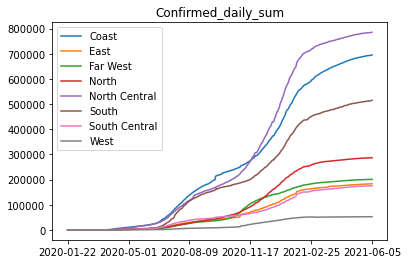

In [86]:
zone_daily_covid_confirmed_sum.plot(title='Confirmed_daily_sum')